In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

## Analysis of Latent Space

In [5]:
prediction = pd.read_csv("../../visualisation/files/prediction/multi_task_phm.csv", sep=";")
latent_space = prediction.loc[:,"latent_space_0":"latent_space_4"]

,ID,IONGAUGEPRESSURE target,ETCHBEAMVOLTAGE target,ETCHBEAMCURRENT target,ETCHSUPPRESSORVOLTAGE target,ETCHSUPPRESSORCURRENT target,FLOWCOOLFLOWRATE target,FLOWCOOLPRESSURE target,ETCHGASCHANNEL1READBACK target,ETCHPBNGASREADBACK target,...,runnum,FIXTURESHUTTERPOSITION_0.0,FIXTURESHUTTERPOSITION_1.0,FIXTURESHUTTERPOSITION_2.0,FIXTURESHUTTERPOSITION_3.0,FIXTURESHUTTERPOSITION_255.0,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,status
0,101.0,0.45055,-0.293069,-0.025119,1.395435,0.101049,0.626165,0.633031,0.284022,0.671834,...,0,0,1,0,0,0,-0.071537,-0.257636,0.863072,0.0
1,102.0,0.45055,-0.293069,-0.027365,1.394727,0.099240,0.626165,0.636170,0.279612,0.683452,...,0,0,1,0,0,0,-0.071531,-0.257632,0.863080,0.0
2,103.0,0.45055,-0.292918,-0.025119,1.394625,0.101957,0.626949,0.636170,0.279612,0.683452,...,0,0,1,0,0,0,-0.071529,-0.257627,0.863088,0.0
3,104.0,0.45055,-0.292918,-0.027228,1.394523,0.100444,0.626949,0.633031,0.279612,0.683452,...,0,0,1,0,0,0,-0.071523,-0.257623,0.863096,0.0
4,105.0,0.45055,-0.292687,-0.026480,1.394727,0.101957,0.626949,0.636810,0.280848,0.685778,...,0,0,1,0,0,0,-0.071518,-0.257618,0.863104,0.0


In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
status = prediction.loc[:,"status"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,principal component 1,principal component 2,status
0,0.089979,-0.183103,0.0
1,0.090530,-0.182973,0.0
2,0.090970,-0.182843,0.0
3,0.090661,-0.182851,0.0
4,0.090807,-0.182803,0.0


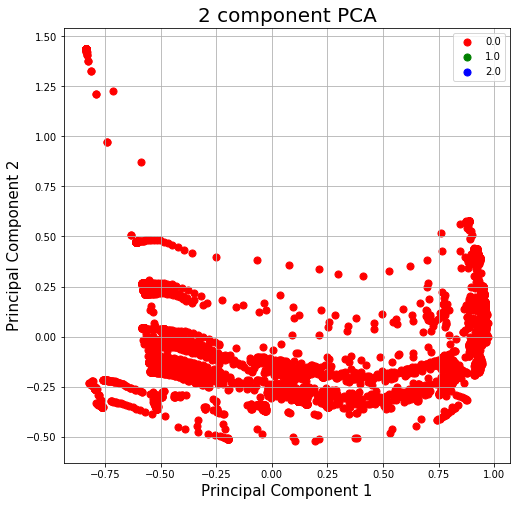

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()